In [1]:
#Basics
import logging
import os
import sys
import warnings
warnings.filterwarnings("ignore")

# Calc Tools
import numpy as np
import pandas as pd
import xarray as xr


C:\Users\u300737\Desktop\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\notebooks
C:\Users\u300737\Desktop\PhD_UHH_WIMI/my_GIT/Synthetic_Airborne_Arctic_ARs/src/


In [2]:
#Basics
import data_config
# Relevant created classes and modules
import flightcampaign as Flight_Campaign
from flightmapping import FlightMaps
from atmospheric_rivers import Atmospheric_Rivers
#Grid Data
from reanalysis import ERA5,CARRA 
#from ICON import ICON_NWP as ICON
import gridonhalo
# Run routines
import run_grid_data_on_halo # to run single days
import campaignAR_plotter # to run analysis for sequence of single days and create combined plots
# IVT variability
from ivtvariability import IVT_Variability_Plotter
#------------------------------------------------------------------------------#
# Plot scripts
import matplotlib 
import matplotlib.pyplot as plt

try:
    from typhon.plots import styles
except:
    print("Typhon module cannot be imported")
import seaborn as sns

import interpdata_plotting
from moisturebudget import Moisture_Budget_Plots as Budget_plots
#-----------------------------------------------------------------------------#
# Config File
analyse_all_flights=True
## Configurations
synthetic_campaign=True
synthetic_flight=True
cmpgn_classes=[]
config_file=data_config.load_config_file(aircraft_base_path,"data_config_file")
cpgn_cls_name="Second_Synthetic_Study"
na_flights=["SRF02","SRF04","SRF07","SRF08"]
snd_flights=["SRF02","SRF03","SRF08","SRF09","SRF12"]
use_era=True
use_carra=True
if use_carra:
    ivt_arg="highres_Interp_IVT"
else:
    ivt_arg="Interp_IVT"


C:\Users\u300737\Desktop\PhD_UHH_WIMI/Work/GIT_Repository//data_config_file.ini
Config-file C:\Users\u300737\Desktop\PhD_UHH_WIMI/Work/GIT_Repository//data_config_file.ini.ini  already exists
C:\Users\u300737\Desktop\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\src/data_config_file.ini
Config-file C:\Users\u300737\Desktop\PhD_UHH_WIMI\my_GIT\Synthetic_Airborne_Arctic_ARs\src/data_config_file.ini.ini  already exists


## Get campaign Hydrometeors

In [4]:
na_campaign_name="North_Atlantic_Run"
snd_campaign_name="Second_Synthetic_Study"

# First campaign
NA_Hydrometeors,NA_HALO_Dict,na_cls=campaignAR_plotter.main(campaign=na_campaign_name,flights=na_flights,
                                             era_is_desired=use_era, icon_is_desired=False,
                                             carra_is_desired=use_carra, do_daily_plots=False,
                                             calc_hmp=True,calc_hmc=False, do_instantaneous=False)
                                                           
NA_Hydrometeors_inst,NA_HALO_Dict_inst,na_cls=campaignAR_plotter.main(campaign=na_campaign_name,
                                                flights=na_flights,era_is_desired=True,
                                                icon_is_desired=False,carra_is_desired=use_carra,
                                                do_daily_plots=False,calc_hmp=True,calc_hmc=False,
                                                do_instantaneous=True)
# Second campaign
SND_Hydrometeors,SND_HALO_Dict,SND_cls=campaignAR_plotter.main(campaign=snd_campaign_name,flights=snd_flights,
                                             era_is_desired=use_era, icon_is_desired=False,
                                             carra_is_desired=use_carra, do_daily_plots=False,
                                             calc_hmp=True,calc_hmc=False, do_instantaneous=False)
                                                           
SND_Hydrometeors_inst,SND_HALO_Dict_inst,SND_cls=campaignAR_plotter.main(campaign=snd_campaign_name,
                                                flights=snd_flights,era_is_desired=True,
                                                icon_is_desired=False,carra_is_desired=use_carra,
                                                do_daily_plots=False,calc_hmp=True,calc_hmc=False,
                                                do_instantaneous=True)                                                        

C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini
Config-file C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini.ini  already exists
Overall directory of campaign work is:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/NA_February_Run/
C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini
Config-file C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini.ini  already exists
Analyse given flight:  SRF02
No data is plotted.
Overall directory of campaign work is:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/NA_February_Run/
Entries:  dict_keys(['data']) have added to or changed in the config file
Synthetic flight track loaded
This none dataset of the flight campaign.
No airborne datasets will be integrated.
Path to open:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/NA_February_Run//data/ERA-5/
open hydrometeor_levels
Load calculated vert

CARRA data is already interpolated
C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini
Config-file C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini.ini  already exists
Analyse given flight:  SRF08
No data is plotted.
Overall directory of campaign work is:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/Second_Synthetic_Study/
Entries:  dict_keys(['data']) have added to or changed in the config file
Synthetic flight track loaded
This none dataset of the flight campaign.
No airborne datasets will be integrated.
Path to open:  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/Second_Synthetic_Study//data/ERA-5/
open hydrometeor_levels
Load calculated vertical total column interpolated data
CARRA data is already interpolated
C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini
Config-file C:\Users\u300737\Desktop\PhD_UHH_WIMI\/Work/GIT_Repository//data_config_file.ini.ini  already ex

## Combine both campaigns

In [6]:
# Test merging for both cases
print("----------------standard---------------------")
#print(campaign_Hydrometeors)
print("----------------instantan---------------------")
#print(campaign_Hydrometeors_inst)

----------------standard---------------------
----------------instantan---------------------


Figure saved as: C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository/Second_Synthetic_Study/plots/CARRA_AR_IVT_Stationarity.pdf


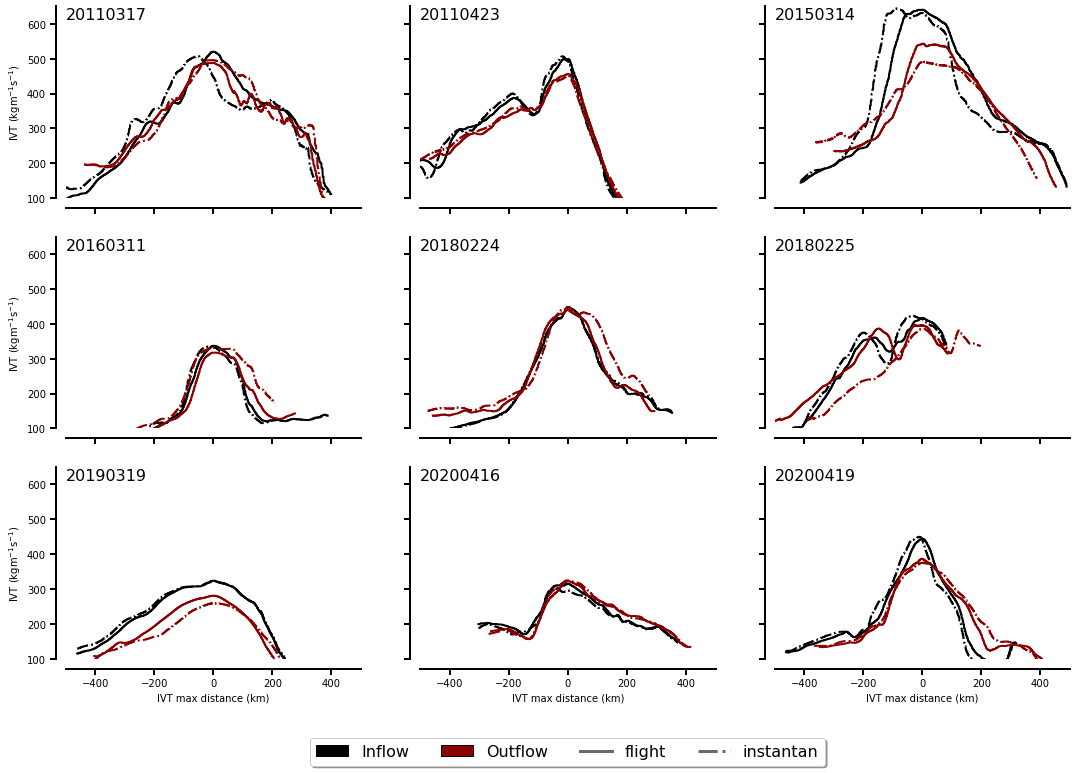

In [7]:
# Plotting
# Adapt the IVT max distance for both flow cross-sections
#ivt_outflow["IVT_max_distance"]=flight_hmp_df["IVT_max_distance"]-ivt_outflow[\
#                                        "IVT_max_distance"].iloc[
#                                            ivt_outflow["flight"].argmax()]
#max_center_inflow=flight_hmp_df[ivt_arg].loc[inflow_index].argmax()
#max_center_distance_inflow=flight_hmp_df[ivt_arg].loc[inflow_index].loc[max_center_inflow]
#max_center_outflow=flight_hmp_df[ivt_arg].loc[outflow_index].argmax()
#max_center_distance_outflow=flight_hmp_df[ivt_arg].loc[outflow_index].loc[max_center_outflow]
matplotlib.rcParams.update({"font.size":16})
if not grid_name=="ERA5":
    ivt_var_arg="highres_Interp_IVT"
else:
    ivt_var_arg="Interp_IVT"
HMP_dict=campaign_Hydrometeors.copy()
row_number=3
col_number=int(len(HMP_dict.keys())/row_number)+len(HMP_dict.keys()) % row_number

f,ax=plt.subplots(nrows=row_number,ncols=col_number,
                          figsize=(18,12),sharex=True,sharey=True)
i=0        
for flight in HMP_dict.keys():
    
    flight_hmp_df=campaign_Hydrometeors[flight]["AR_internal"]
    flight_hmp_df_inst=campaign_Hydrometeors_inst[flight]["AR_internal"]
    # Define sectors
    inflow_index=campaign_HALO[flight]["inflow"].index
    inflow_inst_index=campaign_HALO_inst[flight]["inflow"].index
    outflow_index=campaign_HALO[flight]["outflow"].index
    outflow_inst_index=campaign_HALO_inst[flight]["outflow"].index
    
    # Inflow sectors
    ivt_inflow=pd.DataFrame()
    ivt_inflow["flight"]=flight_hmp_df[ivt_arg].loc[inflow_index].values
    ivt_inflow["inst"]=flight_hmp_df_inst[ivt_arg].loc[inflow_inst_index].values
    ivt_inflow["IVT_max_distance"]=flight_hmp_df["IVT_max_distance"].loc[inflow_index].values
    ivt_outflow=pd.DataFrame()
    ivt_outflow["IVT_max_distance"]=flight_hmp_df["IVT_max_distance"].loc[outflow_index].values
    ivt_outflow["flight"]=flight_hmp_df[ivt_arg].loc[outflow_index].values
    ivt_outflow["inst"]=flight_hmp_df_inst[ivt_arg].loc[outflow_inst_index].values
    
    max_inflow_center=ivt_inflow["IVT_max_distance"].iloc[ivt_inflow["flight"].argmax()]
    max_inflow_inst_center=ivt_inflow["IVT_max_distance"].iloc[ivt_inflow["inst"].argmax()]
    ivt_inflow_center=ivt_inflow["IVT_max_distance"]-max_inflow_center
    ivt_inflow_inst_center=ivt_inflow["IVT_max_distance"]-max_inflow_center
    
    max_outflow_center=ivt_outflow["IVT_max_distance"].iloc[ivt_outflow["flight"].argmax()]
    max_outflow_inst_center=ivt_outflow["IVT_max_distance"].iloc[ivt_outflow["inst"].argmax()]
    
    #ivt_outflow["IVT_max_distance"]=ivt_outflow["IVT_max_distance"]-max_outflow_center
    ivt_outflow_center=ivt_outflow["IVT_max_distance"]-max_outflow_center
    ivt_outflow_inst_center=ivt_outflow["IVT_max_distance"]-max_outflow_inst_center
    if len(ax.shape)>=2:
        if i<col_number:
            horizontal_field=i
            plot_ax=ax[0,horizontal_field]
        elif i<2*col_number:
            horizontal_field=i-col_number
            plot_ax=ax[1,horizontal_field]
            #plot_ax.set_xlabel("IVT max distance (km)")        
        else:
            horizontal_field=i-2*col_number
            plot_ax=ax[2,horizontal_field]
            plot_ax.set_xlabel("IVT max distance (km)")
    if horizontal_field==0:
        plot_ax.set_ylabel("IVT ($\mathrm{kgm}^{-1}\mathrm{s}^{-1})$")
                
    else:
        horizontal_field=i
    #plot_ax=ax[i]
        #plot_ax.set_ylabel("IVT ($\mathrm{kgm}^{-1}\mathrm{s}^{-1})$")
                
    plot_ax.plot(ivt_inflow_center/1000,ivt_inflow["flight"],color="k",lw=2)            
    plot_ax.plot(ivt_inflow_inst_center/1000,ivt_inflow["inst"],color="k",lw=2,ls="-.")
    plot_ax.plot(ivt_outflow_center/1000,ivt_outflow["flight"],color="darkred",lw=2)            
    plot_ax.plot(ivt_outflow_inst_center/1000,ivt_outflow["inst"],color="darkred",lw=2,ls="-.")
    plot_ax.set_title(flight,fontsize=16,loc="left",y=0.9)
    plot_ax.set_xlim([-500,500])
    plot_ax.set_ylim([100,650])
    for axis in ["left","bottom"]:
        plot_ax.spines[axis].set_linewidth(2)
        plot_ax.tick_params(length=6,width=2)#

    from matplotlib.patches import Patch
    from matplotlib.lines import Line2D

    legend_patches = [Patch(facecolor='k', edgecolor='k',label='Inflow'),
                      Patch(facecolor='darkred', edgecolor='k',label='Outflow'),
                      Line2D([0], [0],color="dimgray",ls="-",lw=3,label="flight"),
                      Line2D([0], [0],color="dimgray",ls="-.",lw=3,label="instantan")]
    
    #legend_loc="upper right"
     #       if hmp_inflow[ivt_var_arg].max()>450:
     #           legend_loc="lower right"
            #line_core_in[0],line_core_out[0],
    #        lgd = plot_ax.legend(handles=[\
    #                                  legend_patches[0],legend_patches[1]],
    #                         loc=legend_loc,fontsize=10,ncol=1)
    
    #plot_ax.fill_betweeny(ivt_inflow["IVT_max_distance"]/1000,ivt_inflow["inst"],
    #                        y2=ivt_inflow["flight"],color="grey",alpha=0.7)
    #line_core_in=plot_ax.plot(inflow_core["IVT_max_distance"]/1000,
    #                  inflow_core[ivt_var_arg],lw=2,color="darkblue",
    #                  label="AR core (in): TIVT="+\
    #                              str((TIVT_inflow_core/1e6).round(1)))
    #
    #        plot_ax.plot(hmp_outflow["IVT_max_distance"]/1000,
    #             hmp_outflow[ivt_var_arg],color="orange",lw=8)
    
    #        line_core_out=plot_ax.plot(outflow_core["IVT_max_distance"]/1000,
    #                           outflow_core[ivt_var_arg],
    #                           lw=2,color="darkred",
    #                           label="AR core (out): TIVT="+\
    #                               str((TIVT_outflow_core/1e6).round(1)))

        
    #        plot_ax.plot(ar_inflow_warm_sector["IVT_max_distance"]/1000,
    #             ar_inflow_warm_sector[ivt_var_arg],
    #             lw=3,ls=":",color="darkblue")
        
    #        plot_ax.plot(ar_inflow_cold_sector["IVT_max_distance"]/1000,
    #             ar_inflow_cold_sector[ivt_var_arg],
    #             lw=3,ls="-.",color="darkblue")
   # 
    #        plot_ax.plot(ar_outflow_warm_sector["IVT_max_distance"]/1000,
    #             ar_outflow_warm_sector[ivt_var_arg],
    #             lw=3,ls=":",color="darkred")
    #        plot_ax.plot(ar_outflow_cold_sector["IVT_max_distance"]/1000,
    #             ar_outflow_cold_sector[ivt_var_arg],
    #             lw=3,ls="-.",color="darkred")
                
    i+=1
sns.despine(offset=10)

plot_ax.legend(handles=legend_patches,loc='lower left',
               bbox_to_anchor=(-1.6, -0.6),ncol=4,
               fontsize=16, fancybox=True, shadow=True)

fig_name=grid_name+"_AR_IVT_Stationarity.pdf"
plot_path=SND_cls.plot_path
f.savefig(plot_path+fig_name,dpi=60,bbox_inches="tight")
print("Figure saved as:", SND_cls.plot_path+fig_name)

#inflow_maxima=flight_hmp_df["IVT_max_distance"].loc[]
#ax1.plot(ivt_inflow["IVT_max_distance"],ivt_inflow["flight"],
#          color="k",lw=2,ls="-.")
#ax1.plot(ivt_outflow["IVT_max_distance"],flight_hmp_df[ivt_arg].loc[outflow_index],
#         color="grey",lw=2,ls="--")

#ax1.plot(flight_hmp_df["IVT_max_distance"].loc[inflow_index])


#ax1.plot(flight_hmp_df["IVT_max_distance"].loc[outflow_index],color="darkred",
#         lw=2,ls="-.",flight_hmp_df_inst[ivt_arg].loc[outflow_index])


#ax_in=ivt_inflow.plot()
#ax_in.set_ylabel("IVT in $\\mathrm{kg}{\\mathrm{m}}^{-1}{\\mathrm{s}}^{-1}$")
#print(NA_Hydrometeors.keys())#
#ax_in.set_ylim([100,650])
#grid_name="ERA5"
#if use_carra:
#    grid_name="CARRA"
#ax.figure.savefig('demo-file.pdf')"
            


In [10]:
# Plotting
#ax_out=ivt_outflow.plot()
#ax_out.set_ylabel("IVT in $\\mathrm{kg}{\\mathrm{m}}^{-1}{\\mathrm{s}}^{-1}$")
#print(NA_Hydrometeors.keys())
#grid_name="ERA5"
#if use_carra:
#    grid_name="CARRA"#
#
#ax_out.set_ylim([100,650])


In [11]:
ivt_inflow

,flight,inst,IVT_max_distance
0,120.133877,122.630950,-442500
1,120.133877,122.630950,-442250
2,119.304803,122.158233,-442000
3,119.304803,122.158233,-441750
4,119.304803,122.158233,-441500
...,...,...,...
3116,143.679365,136.303514,336500
3117,143.679365,136.303514,336750
3118,143.679365,136.303514,337000
3119,143.679365,136.303514,337250
